In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
from matplotlib import rc
rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 12

In [2]:
# Read in the distributed lag results for the different smoke estimates for 2022
KATE = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2022_KATE_ED_ALLDIAG.csv")
BF = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2022_BONNE_ED.csv")
BF_KOvgp = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2022_BONNE_KOvgp_ED.csv")

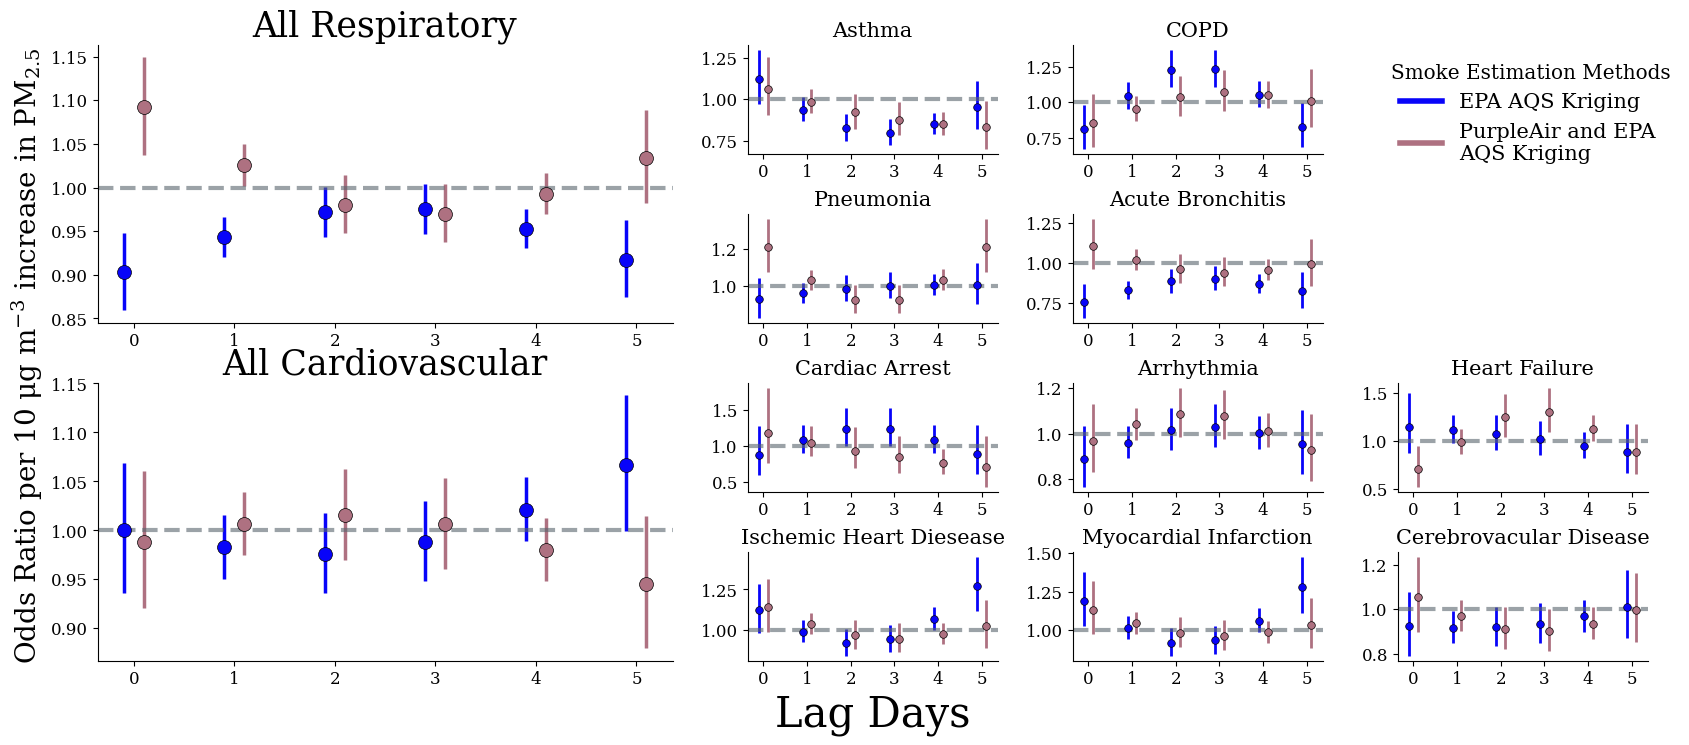

In [3]:
# Loop through the plotting
outcome = ["allresp1", "asthma1","COPD1","pneumonia1","bronchitis1", "allcardio1", "cardiacarrest1","arrythmia1","heartfail1","ischemic1","MI1","cerebrovascular1"]
titles = ['All Respiratory', 'Asthma', 'COPD', 'Pneumonia', 'Acute Bronchitis', 'All Cardiovascular', 'Cardiac Arrest', 'Arrhythmia', 'Heart Failure', 'Ischemic Heart Diesease', 
'Myocardial Infarction', 'Cerebrovacular Disease']

fig = plt.figure(figsize = (20,8))
plt.subplots_adjust(hspace=.55)
plt.subplots_adjust(wspace=.3)

ax0 = plt.subplot2grid((4, 5), (0, 0), rowspan = 2, colspan = 2)
ax1 = plt.subplot2grid((4, 5), (0, 2))
ax2 = plt.subplot2grid((4, 5), (0, 3))
ax3 = plt.subplot2grid((4, 5), (1, 2))
ax4 = plt.subplot2grid((4, 5), (1, 3))

ax5 = plt.subplot2grid((4, 5), (2, 0), colspan = 2, rowspan = 2)
ax6 = plt.subplot2grid((4, 5), (2, 2))
ax7 = plt.subplot2grid((4, 5), (2, 3))
ax8= plt.subplot2grid((4, 5), (2, 4))
ax9 = plt.subplot2grid((4, 5), (3, 2))
ax10 = plt.subplot2grid((4, 5), (3, 3))
ax11 = plt.subplot2grid((4, 5), (3, 4))

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]
#plt.suptitle('ED April-August 2022', fontsize = 30, y = 1.)
for i in range(0, 12):
        df_KATE = KATE[KATE['outcome'] == outcome[i]]
        df_BF = BF[BF['outcome'] == outcome[i]]
        if (i == 0) | (i == 5): 
            axes[i].scatter(df_KATE['time']-0.1,df_KATE['odds_ratio'], color = 'xkcd:primary blue', edgecolor = 'k', lw = .5, s = 100, zorder = 4)   
            axes[i].vlines(x =df_KATE['time']-0.1, ymin = df_KATE['lower_95'],ymax = df_KATE['upper_95'], color = 'xkcd:primary blue', lw = 2.5)
            axes[i].scatter(df_BF['time']+0.1,df_BF['odds_ratio'], color = 'xkcd:mauve', edgecolor = 'k', lw = .5, s = 100, zorder = 4)   
            axes[i].vlines(x =df_BF['time']+0.1, ymin = df_BF['lower_95'],ymax = df_BF['upper_95'], color = 'xkcd:mauve', lw = 2.5)
            axes[i].set_title(titles[i], fontsize = 25)
        if (i == 1) | (i == 2) | (i == 3) | (i == 4) | (i == 6) | (i == 7) | (i == 8) | (i == 9) | (i == 10) | (i == 11):
            axes[i].scatter(df_KATE['time']-0.1,df_KATE['odds_ratio'], color = 'xkcd:primary blue', edgecolor = 'k', lw = .5, s = 30, zorder = 4)   
            axes[i].vlines(x =df_KATE['time']-0.1, ymin = df_KATE['lower_95'],ymax = df_KATE['upper_95'], color = 'xkcd:primary blue', lw = 2)
            axes[i].scatter(df_BF['time']+0.1,df_BF['odds_ratio'], color = 'xkcd:mauve', edgecolor = 'k', lw = .5, s = 30, zorder = 4)   
            axes[i].vlines(x =df_BF['time']+0.1, ymin = df_BF['lower_95'],ymax = df_BF['upper_95'], color = 'xkcd:mauve', lw = 2)
            axes[i].set_title(titles[i], fontsize = 15)

        if (i == 5):
            axes[i].set_ylabel('Odds Ratio per 10 $\mu$g m$^{-3}$ increase in PM$_{2.5}$', fontsize = 20, y  = 1.1)
        if (i == 9):
            axes[i].set_xlabel('Lag Days', fontsize = 30)
        if (i == 2):
             axes[i].plot([],[], color = 'xkcd:primary blue', lw = 4, label = 'EPA AQS Kriging')
             axes[i].plot([],[], color = 'xkcd:mauve', lw = 4, label = 'PurpleAir and EPA \nAQS Kriging')
             leg = axes[i].legend(bbox_to_anchor = [1.2,1], fontsize = 15, frameon = False)
             leg.set_title(title = 'Smoke Estimation Methods', prop={'size':'large'})
        axes[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
        axes[i].set_xticks(np.arange(0,6, 1));
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
fig.savefig('../Figures/EDSmokeEstimation.png', dpi = 300, bbox_inches = 'tight')


In [4]:
lag = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2022_KAMAL_ED.csv")

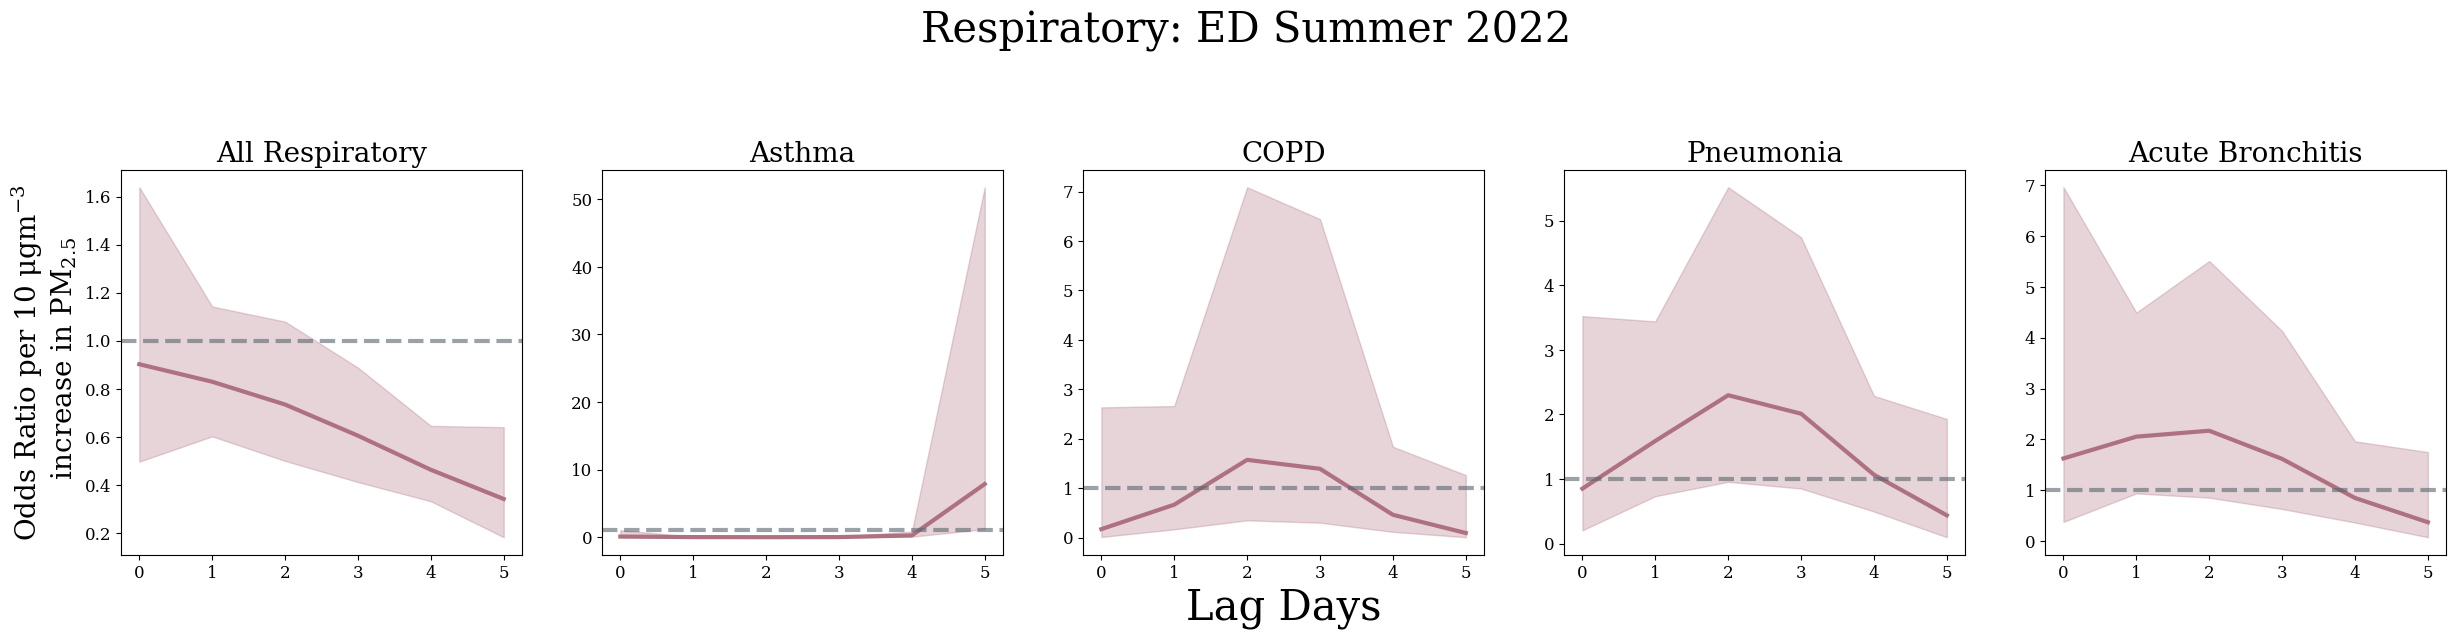

In [5]:
listy = ["allresp1", "asthma1","COPD1","pneumonia1","bronchitis1"]
list2 = ['All Respiratory', 'Asthma', 'COPD', 'Pneumonia', 'Acute Bronchitis']
fig, axs = plt.subplots(ncols=5,nrows=1,figsize=(30,5), gridspec_kw = {'wspace':.2, 'hspace':-.1})
#axs=axs.flatten()
#fig.patch.set_visible(False)
plt.suptitle('Respiratory: ED Summer 2022', fontsize = 30, y = 1.2)
for i in range(0,5):
        df = lag[lag['outcome'] == listy[i]]
        axs[i].plot(df['time'],df['odds_ratio'], color = 'xkcd:mauve', lw = 3)
        axs[i].fill_between(df['time'],df['lower_95'],df['upper_95'], color = 'xkcd:mauve', alpha = 0.3)
        axs[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
        axs[i].set_xticks(np.arange(0,6, 1));
        #axs[i].set_ylim([.7,1.3])
        axs[i].set_title(list2[i], fontsize = 20)
        if (i == 0):
            axs[i].set_ylabel('Odds Ratio per 10 $\mu g m^{-3}$\n increase in PM$_{2.5}$', fontsize = 20)
        elif (i == 2):
            axs[i].set_xlabel('Lag Days', fontsize = 30)

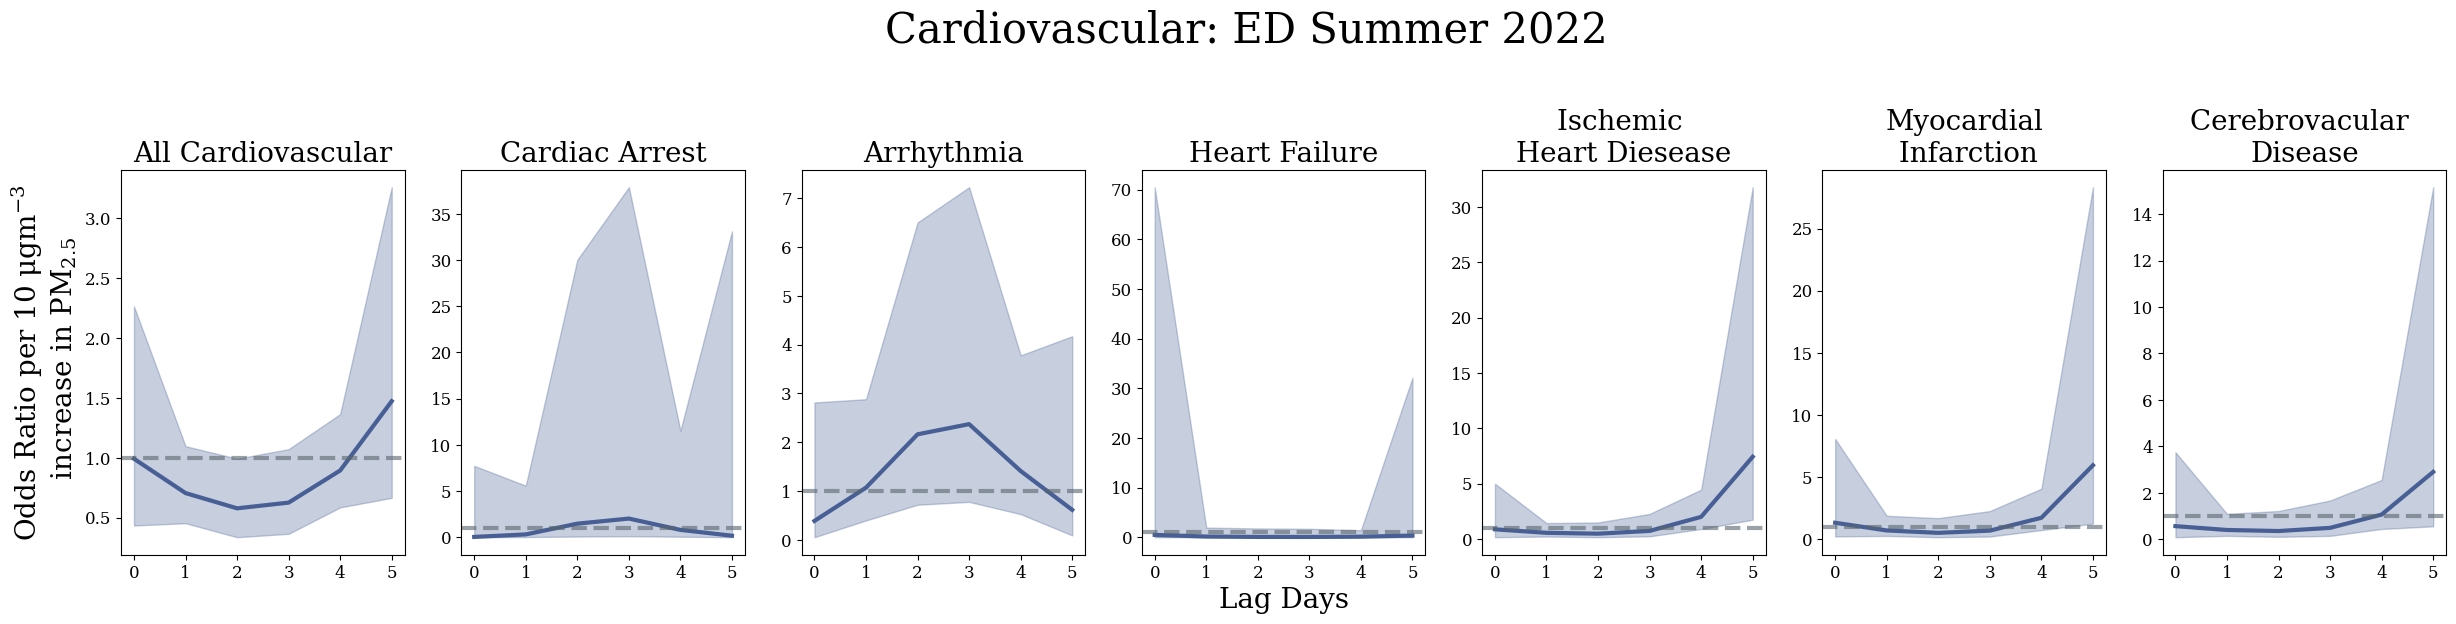

In [6]:
listy = ["allcardio1", "cardiacarrest1","arrythmia1","heartfail1","ischemic1","MI1","cerebrovascular1"]
list2 = ['All Cardiovascular', 'Cardiac Arrest', 'Arrhythmia', 'Heart Failure', 'Ischemic \nHeart Diesease', 'Myocardial\n Infarction', 'Cerebrovacular \nDisease']
fig, axs = plt.subplots(ncols=7,nrows=1,figsize=(30,5), gridspec_kw = {'wspace':.2, 'hspace':-.1})
#axs=axs.flatten()
#fig.patch.set_visible(False)
plt.suptitle('Cardiovascular: ED Summer 2022', fontsize = 30, y = 1.2)
for i in range(0,7):
        df = lag[lag['outcome'] == listy[i]]
        #plt.scatter(df['time'],df['odds_ratio'], color = 'xkcd:mauve', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
        #plt.vlines(x =df['time'], ymin = df['lower_95'],ymax = df['upper_95'], color = 'xkcd:mauve', lw = 2.5)
        axs[i].plot(df['time'],df['odds_ratio'], color = 'xkcd:dusky blue', lw = 3)
        axs[i].fill_between(df['time'],df['lower_95'],df['upper_95'], color = 'xkcd:dusky blue', alpha = 0.3)
        axs[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
        axs[i].set_xticks(np.arange(0,6, 1));
        #axs[i].set_ylim([.7,1.3])
        axs[i].set_title(list2[i], fontsize = 20)
        if (i == 0):
            axs[i].set_ylabel('Odds Ratio per 10 $\mu g m^{-3}$\n increase in PM$_{2.5}$', fontsize = 20)
        elif (i == 3):
            axs[i].set_xlabel('Lag Days', fontsize = 20)